# Causes of Death in Finland - COVID-19 Analysis

In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import Image
from pathlib import Path
from src import settings
%matplotlib inline
plt.style.use('seaborn')

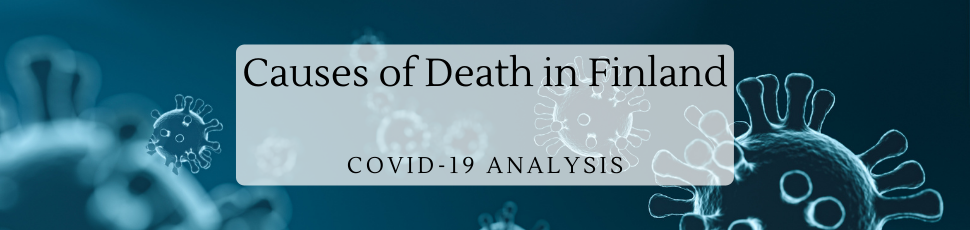

In [2]:
Image(filename=settings.REFERENCES_PATHS['IMG'] / 'COVID-19.png', width=1000)

## 1. Import and clean the data

In [3]:
# Import cause of death data
df = pd.read_csv(settings.DATA_PATHS['PROCESSED'] / 'statfin_ksyyt_pxt_11bs_2021-12-29.csv', index_col=0)
df.head()

,Underlying cause of death (time series classification),Age,Gender,Year,Information,value
0,"00 COVID-19 virus infection (U071, U072)",0,Males,2010,Deaths,0
1,"00 COVID-19 virus infection (U071, U072)",0,Males,2011,Deaths,0
2,"00 COVID-19 virus infection (U071, U072)",0,Males,2012,Deaths,0
3,"00 COVID-19 virus infection (U071, U072)",0,Males,2013,Deaths,0
4,"00 COVID-19 virus infection (U071, U072)",0,Males,2014,Deaths,0


In [4]:
# Remove "Information" column because there is no observations
df.drop('Information', inplace=True, axis=1)

# Rename columns for clarity
df.rename(columns={'Underlying cause of death (time series classification)': 'Cause_of_death', 'value': 'Deaths'}, inplace=True)

# Change "Age" as categorical variable
df.Age = df.Age.astype('category')

# Reorder "Age" categories
df.Age.cat.reorder_categories(['0', '1 - 4', '5 - 9', '10 - 14', '15 - 19', '20 - 24', '25 - 29',
        '30 - 34', '35 - 39', '40 - 44', '45 - 49', '50 - 54', '55 - 59',
        '60 - 64', '65 - 69', '70 - 74', '75 - 79', '80 - 84', '85 - 89',
        '90 - 94', '95 -'], inplace=True)

In [5]:
# Check the data
df.head(), df.dtypes

(                             Cause_of_death Age Gender  Year  Deaths
 0  00 COVID-19 virus infection (U071, U072)   0  Males  2010       0
 1  00 COVID-19 virus infection (U071, U072)   0  Males  2011       0
 2  00 COVID-19 virus infection (U071, U072)   0  Males  2012       0
 3  00 COVID-19 virus infection (U071, U072)   0  Males  2013       0
 4  00 COVID-19 virus infection (U071, U072)   0  Males  2014       0,
 Cause_of_death      object
 Age               category
 Gender              object
 Year                 int64
 Deaths               int64
 dtype: object)

## 2. Explore the data

### 2.1. Causes of Death in Finland in 2020

#### 2.1.1. Pivot Table - Causes of Death 2020

In [6]:
df_2020 = df[df.Year == 2020]

In [7]:
# Create pivot table and add columns Percentage % and Rank
pivot_2020 = df_2020.pivot_table(index=['Cause_of_death'], values='Deaths', aggfunc='sum').sort_values('Deaths', ascending=False)
pivot_2020['Percentage %'] = round((pivot_2020.Deaths / pivot_2020.Deaths.sum() * 100), 2)
pivot_2020['Rank'] = [x + 1 for x in range(0,54)]

In [8]:
pivot_2020

,Deaths,Percentage %,Rank
Cause_of_death,,,
"25 Dementia, Alzheimers disease (F01, F03, G30, R54)",10673,19.65,1
27 Ischaemic heart diseases (I20-I25),8600,15.83,2
"30 Other diseases of the circulatory system (I00-I15, I26-I28, I70-I99)",4232,7.79,3
29 Cerebrovascular diseases (I60-I69),4026,7.41,4
"11 Malignant neoplasm of larynx, trachea, bronchus and lung (C32-C34)",2322,4.28,5
26 Other diseases of the nervous system and sense organs excl. alcohol-related,2076,3.82,6
21 Other malignant neoplasms,2048,3.77,7
41 Alcohol-related diseases and accidental poisoning by alcohol,1716,3.16,8
"28 Other heart diseases excl. rheumatic and alcohol-related (I30-I425, I427-I52)",1638,3.02,9


#### 2.1.2. Findings
1. According to cause of death classification used by statfi, *COVID-19 virus infection* was 21st common cause of death in Finland during year 2020 and constituted 1,03% of all deaths. 
2. *COVID-19 virus infection* is roughly as usual cause of death in Finland as *Primary malignant neoplasm of liver and intrahepatic bile ducts* and *Other diseases excl. alcohol-related*.

### 2.2. Causes of Death and COVID-19 - Trend Analysis

#### 2.2.1. Pivot Table - Comparison to Year 2019

In [9]:
# Create pivot table containing columns for Absolute change and Pct change in Cause of Deaths 2019 - 2020
df_comparison = df[df.Year.isin([2019, 2020])].pivot_table(index=['Cause_of_death'], columns=['Year'], values='Deaths',\
                                                       aggfunc='sum').sort_values(2020, ascending=False)

df_comparison['Absolute_change'] = df_comparison[2020] - df_comparison[2019]
df_comparison['Pct_change'] = round(df_comparison['Absolute_change'] / df_comparison[2019] * 100, 2)

In [10]:
df_comparison

Year,2019,2020,Absolute_change,Pct_change
Cause_of_death,,,,
"25 Dementia, Alzheimers disease (F01, F03, G30, R54)",10153,10673,520,5.12
27 Ischaemic heart diseases (I20-I25),8630,8600,-30,-0.35
"30 Other diseases of the circulatory system (I00-I15, I26-I28, I70-I99)",3957,4232,275,6.95
29 Cerebrovascular diseases (I60-I69),3991,4026,35,0.88
"11 Malignant neoplasm of larynx, trachea, bronchus and lung (C32-C34)",2383,2322,-61,-2.56
26 Other diseases of the nervous system and sense organs excl. alcohol-related,1933,2076,143,7.40
21 Other malignant neoplasms,1931,2048,117,6.06
41 Alcohol-related diseases and accidental poisoning by alcohol,1718,1716,-2,-0.12
"28 Other heart diseases excl. rheumatic and alcohol-related (I30-I425, I427-I52)",1689,1638,-51,-3.02


#### 2.2.2. Pivot Table - Highest Growth (Absolute, 2019 - 2020)

In [11]:
df_comparison.nlargest(10, columns='Absolute_change')

Year,2019,2020,Absolute_change,Pct_change
Cause_of_death,,,,
"00 COVID-19 virus infection (U071, U072)",0,558,558,inf
"25 Dementia, Alzheimers disease (F01, F03, G30, R54)",10153,10673,520,5.12
"30 Other diseases of the circulatory system (I00-I15, I26-I28, I70-I99)",3957,4232,275,6.95
26 Other diseases of the nervous system and sense organs excl. alcohol-related,1933,2076,143,7.40
21 Other malignant neoplasms,1931,2048,117,6.06
10 Malignant neoplasm of pancreas (C25),1199,1312,113,9.42
36 Diseases of the digestive system excl. alcohol-related diseases,1271,1359,88,6.92
23 Diabetes mellitus (E10-E14),595,667,72,12.10
13 Malignant neoplasm of breast (C50),881,951,70,7.95


In [12]:
# Create df of highest growing cod 2019 -> 2020 to draw a graph to review 2010s trend
top_absgrowth = list(df_comparison.nlargest(10, columns='Absolute_change').index)
df_absgrowth = df[df.Cause_of_death.isin(top_absgrowth)]

#### 2.2.3. Bar Chart - Highest Growth (Absolute, 2019 - 2020)

Text(0.5, 1.0, '2010s Trend (absolute growth) for highest growing cod 2019 - 2020')

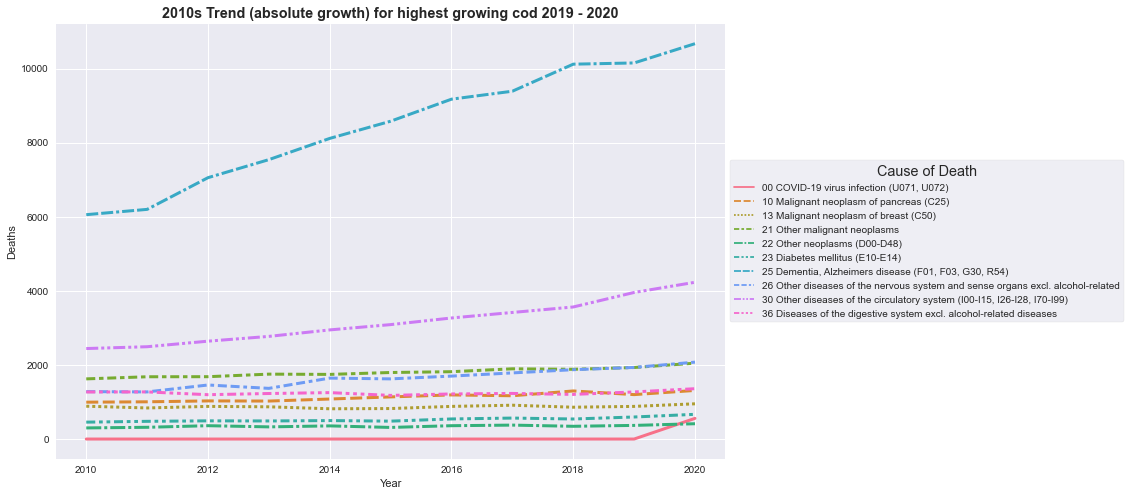

In [13]:
# Lineplot highest growing causes of death from 2019 to 2020 (absolute value) to review 2010s trend 
fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(data=df_absgrowth, x='Year', y='Deaths', hue='Cause_of_death', style='Cause_of_death', estimator=sum, ci=None, linewidth=3)
plt.legend(bbox_to_anchor=(1, 0.5), loc='center left', frameon=True, title="Cause of Death", title_fontsize='x-large')
plt.title('2010s Trend (absolute growth) for highest growing cod 2019 - 2020', fontsize='x-large', weight='bold')

#### 2.2.4. Pivot Table - Highest Growth (Pct, 2019 - 2020)

In [14]:
df_comparison.nlargest(10, columns='Pct_change')

Year,2019,2020,Absolute_change,Pct_change
Cause_of_death,,,,
"00 COVID-19 virus infection (U071, U072)",0,558,558,inf
"52 Event of undetermined intent (Y16-Y34, Y872)",53,74,21,39.62
47 Accidental drownings (W65-W74),101,128,27,26.73
"51 Assault (X85-Y09, Y871)",65,75,10,15.38
05 Malignant neoplasm of oesophagus (C15),315,356,41,13.02
22 Other neoplasms (D00-D48),368,413,45,12.23
23 Diabetes mellitus (E10-E14),595,667,72,12.10
42 Land traffic accidents,174,195,21,12.07
"48 Accidental poisonings excl. accidental poisoning by alcohol (X40-X44, X46-X49, Y10-Y15)",278,310,32,11.51


#### 2.2.5. Pivot Table - Highest Decline (Absolute, 2019 - 2020)

In [15]:
df_comparison.nsmallest(10, columns='Absolute_change')

Year,2019,2020,Absolute_change,Pct_change
Cause_of_death,,,,
31 Influenza (J09-J11),185,58,-127,-68.65
"35 Other diseases of the respiratory system (J00-J06, J20-J39, J60-J64, J66-J848, J85-J99)",414,330,-84,-20.29
"08 Malignant neoplasm of rectum, anus and anal canal (C20-C21)",453,378,-75,-16.56
"11 Malignant neoplasm of larynx, trachea, bronchus and lung (C32-C34)",2383,2322,-61,-2.56
49 Other accidents and sequelae of accidents,436,376,-60,-13.76
"28 Other heart diseases excl. rheumatic and alcohol-related (I30-I425, I427-I52)",1689,1638,-51,-3.02
16 Malignant neoplasm of ovary (C56),321,277,-44,-13.71
46 Accidental falls (W00-W19),1190,1151,-39,-3.28
27 Ischaemic heart diseases (I20-I25),8630,8600,-30,-0.35


In [16]:
# Create df of highest declining cod 2019 -> 2020 to draw a graph to review 2010s trend
top_absdec = list(df_comparison.nsmallest(10, columns='Absolute_change').index)
df_absdec = df[df.Cause_of_death.isin(top_absdec)]

#### 2.2.6. Bar Chart - Highest Decline (Absolute, 2019 - 2020)

Text(0.5, 1.0, '2010s evolution (absolute decline) of highest declining causes of death druing 2019 - 2020')

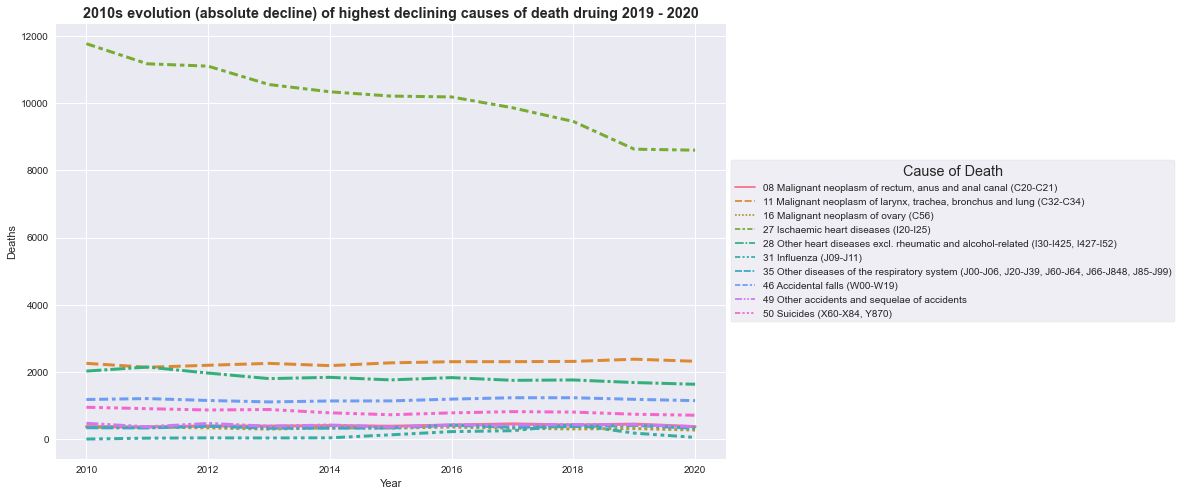

In [17]:
# Lineplot highest declining causes of death from 2019 to 2020 (absolute value) to review 2010s trend 
fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(data=df_absdec, x='Year', y='Deaths', hue='Cause_of_death', style='Cause_of_death', estimator=sum, ci=None, linewidth=3)
plt.legend(bbox_to_anchor=(1, 0.5), loc='center left', frameon=True, title="Cause of Death", title_fontsize='x-large')
plt.title('2010s evolution (absolute decline) of highest declining causes of death druing 2019 - 2020', fontsize='x-large', weight='bold')

#### 2.2.7. Pivot Table - Highest Decline (Pct, 2019 - 2020)

In [18]:
df_comparison.nsmallest(10, columns='Pct_change')

Year,2019,2020,Absolute_change,Pct_change
Cause_of_death,,,,
31 Influenza (J09-J11),185,58,-127,-68.65
45 Others and unspecified transport accidents (V95-V99),2,1,-1,-50.00
"53 Other external causes and sequelae of other external causes (Y35-Y84, Y88-Y89)",8,5,-3,-37.50
02 Human immunodeficiency virus (HIV) disease (B20-B24),3,2,-1,-33.33
44 Water transport accidents (V90-V94),34,23,-11,-32.35
"01 Tuberculosis (A15-A19, B90, J65)",29,21,-8,-27.59
"35 Other diseases of the respiratory system (J00-J06, J20-J39, J60-J64, J66-J848, J85-J99)",414,330,-84,-20.29
"08 Malignant neoplasm of rectum, anus and anal canal (C20-C21)",453,378,-75,-16.56
49 Other accidents and sequelae of accidents,436,376,-60,-13.76


#### 2.2.8. Findings
1. *COVID-19 virus infection* was the highest growing cause of death in Finland in 2020 (both absolute, and (obviously) percentual growth)
2. *Influenza* was the highest declining cause of death in Finland in 2020. Probably due to covid-19 restrictions, which prevented influenza infections as well.
3. According to the graphs, it seems that COVID-19 has not influenced to causes of death in Finland significantly. For many causes of death, which has been either growing or declining from 2019 to 2020, there has been longer-term trend.
4. One remarkable finding is that *Suicides* declined, even though there has been concerns how COVID-19 pandemic impacts on mental health and wellbeing. 

### 2.3. COVID-19 deaths in Finland by Demographics

#### 2.3.1. Pivot Table - COVID-19 Deaths by Age and Gender

In [19]:
df_covid = df_2020[df_2020.Cause_of_death == '00 COVID-19 virus infection (U071, U072)']

In [20]:
pivot_covid = df_covid.pivot_table(index=['Age'], columns='Gender', values='Deaths', aggfunc='sum', margins=True)
pivot_covid

Gender,Females,Males,All
Age,,,
0,0,0,0
1 - 4,0,0,0
5 - 9,0,0,0
10 - 14,0,0,0
15 - 19,0,0,0
20 - 24,0,1,1
25 - 29,0,0,0
30 - 34,0,1,1
35 - 39,0,5,5


#### 2.3.2. Bar Chart - COVID-19 Deaths by Age and Gender

Text(0.5, 1.0, 'COVID-19 deaths in Finland by Age and Gender')

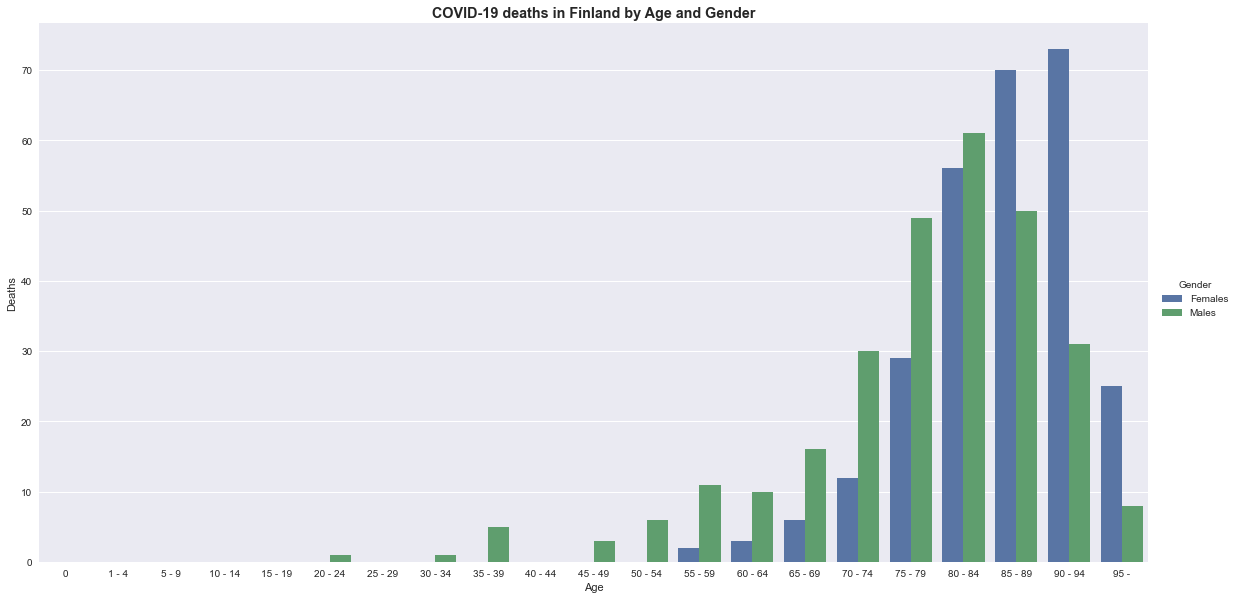

In [21]:
sns.catplot(x='Age', y='Deaths', hue='Gender', hue_order=['Females', 'Males'], data=df_covid, kind='bar', height=8, aspect=2, estimator=sum, ci=None)
plt.title('COVID-19 deaths in Finland by Age and Gender', fontsize='x-large', weight='bold')

#### 2.3.3. Pivot Table - COVID-19 Deaths Percentage of All Deaths by Demographics

In [22]:
pivot_demographics = df_2020.pivot_table(index=['Age', 'Gender'], values='Deaths', aggfunc='sum')
pivot_demographics['COVID-19 Deaths'] = df_covid.groupby(['Age', 'Gender'])['Deaths'].sum()
pivot_demographics['COVID-19 Deaths % of all Deaths'] = round(pivot_demographics['COVID-19 Deaths'] / pivot_demographics['Deaths'] * 100, 2)

In [23]:
pivot_demographics

Deaths  COVID-19 Deaths  COVID-19 Deaths % of all Deaths
Age     Gender                                                           
0       Females      37                0                             0.00
        Males        50                0                             0.00
1 - 4   Females       8                0                             0.00
        Males        15                0                             0.00
5 - 9   Females       3                0                             0.00
        Males         9                0                             0.00
10 - 14 Females      10                0                             0.00
        Males        12                0                             0.00
15 - 19 Females      36                0                             0.00
        Males        83                0                             0.00
20 - 24 Females      46                0                             0.00
        Males       141                1                             0.71
25 - 29 Females      54                0                             0.00
        Males       167                0                             0.00
30 - 34 Females      70                0                             0.00
        Males       162                1                             0.62
35 - 39 Females      89                0                             0.00
        Males       218                5                             2.29
40 - 44 Females     123                0                             0.00
        Males       331                0                             0.00
45 - 49 Females     187                0                             0.00
        Males       425                3                             0.71
50 - 54 Females     310                0                             0.00
        Males       694                6                             0.86
55 - 59 Females     552                2                             0.36
        Males      1134               11                             0.97
60 - 64 Females     834                3                             0.36
        Males      1809               10                             0.55
65 - 69 Females    1446                6                             0.41
        Males      2531               16                             0.63
70 - 74 Females    2376               12                             0.51
        Males      3895               30                             0.77
75 - 79 Females    2613               29                             1.11
        Males      3554               49                             1.38
80 - 84 Females    4133               56                             1.35
        Males      4491               61                             1.36
85 - 89 Females    5597               70                             1.25
        Males      4120               50                             1.21
90 - 94 Females    5570               73                             1.31
        Males      2663               31                             1.16
95 -    Females    2918               25                             0.86
        Males       798                8                             1.00

#### 2.3.4. Top 10 Highest COVID-19 Death Percentage of All Deaths by Demographics

In [24]:
pivot_demographics.nlargest(10, 'COVID-19 Deaths % of all Deaths')

Deaths  COVID-19 Deaths  COVID-19 Deaths % of all Deaths
Age     Gender                                                           
35 - 39 Males       218                5                             2.29
75 - 79 Males      3554               49                             1.38
80 - 84 Males      4491               61                             1.36
        Females    4133               56                             1.35
90 - 94 Females    5570               73                             1.31
85 - 89 Females    5597               70                             1.25
        Males      4120               50                             1.21
90 - 94 Males      2663               31                             1.16
75 - 79 Females    2613               29                             1.11
95 -    Males       798                8                             1.00

#### 2.3.5. Findings
1. Most of the deaths caused by *COVID-19 virus infection* occurs among older people (+70 years old). 
2. No deaths caused by *COVID-19 virus infection* among females under 55 years old and only few among men. 
3. Highest rate of deaths caused by *COVID-19 virus infection* of all deaths was 2.29% and it was among 35-39 year old males. But there are only few observations (5 deaths) and thus any conclusions should not be drawn.